Authors:


*   Ege Kaan Özalp - 28989
*   Yasemin Sarpkaya - 29172



# Importing the Necessary Libraries

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# EDA (Exploratory Data Analyis)

In [3]:
df_titanic = pd.read_excel("titanic raw data.xls")
df_titanic

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000      0      0   24160  211.3375       B5        S    2   
1       male   0.9167      1      2  113781  151.5500  C22 C26        S   11   
2     female   2.0000      1      2  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000      1      2  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000      1      2  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1304  female  14.5000      1      0    2665   14.4542      NaN        C  NaN   
1305  female      NaN      1      0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000      0      0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000      0      0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000      0      0  315082    7.8750      NaN        S  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1309 rows x 14 columns]

In [4]:
# Class Weights: Approximately close.
df_titanic["survived"].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

Survival rate by Sex:
sex
female    0.727468
male      0.190985
Name: survived, dtype: float64 



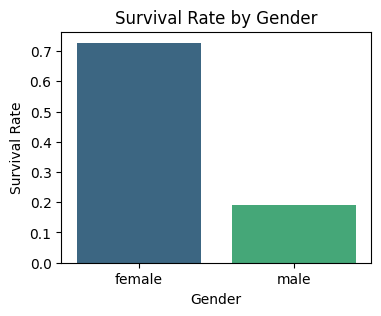

In [5]:
# Survival Rate by Gender:
survival_rate_gender = df_titanic.groupby('sex')['survived'].mean()
print("Survival rate by Sex:")
print(survival_rate_gender, "\n")

# Plotting the survival rate with respect to gender:
plt.figure(figsize=(4, 3))
sns.barplot(x='sex', y='survived', data=df_titanic, ci=None, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel("Gender")
plt.ylabel('Survival Rate')
plt.show()

In [6]:
# Analyze the null values per column:
print("Null values per column:")
print(df_titanic.isnull().sum())

Null values per column:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [7]:
# Dropping the possibly unnecessary or non-imputable (due to so many missing values)
# columns:
df_titanic.columns
df_titanic = df_titanic[['pclass', "name", 'survived', 'sex', 'age', 'sibsp', 'parch',
                         'ticket', 'fare', 'embarked']]

In [8]:
# Impute the age value with the mean:
df_titanic["age"].fillna(df_titanic["age"].mean(), inplace=True)

In [9]:
# Define the function that will turn the numerical class, age and survived data
# into categorical data.
def classConverter(instance):
  if instance == 1:
    return "first"
  elif instance == 2:
    return "second"
  else:
    return "third"

def ageConverter(instance):
  if instance >= 18:
    return "adult"
  else:
    return "child"

def survivedConverter(instance):
  if instance == 1:
    return "yes"
  else:
    return "no"

In [10]:
# Turn the numerical class, age and survived data into categorical data.
df_titanic["pclass"] = df_titanic["pclass"].apply(lambda x: classConverter(x))
df_titanic["age"] = df_titanic["age"].apply(lambda x: ageConverter(x))
df_titanic["survived"] = df_titanic["survived"].apply(lambda x: survivedConverter(x))
df_titanic

pclass                                             name survived     sex  \
0     first                    Allen, Miss. Elisabeth Walton      yes  female   
1     first                   Allison, Master. Hudson Trevor      yes    male   
2     first                     Allison, Miss. Helen Loraine       no  female   
3     first             Allison, Mr. Hudson Joshua Creighton       no    male   
4     first  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       no  female   
...     ...                                              ...      ...     ...   
1304  third                             Zabour, Miss. Hileni       no  female   
1305  third                            Zabour, Miss. Thamine       no  female   
1306  third                        Zakarian, Mr. Mapriededer       no    male   
1307  third                              Zakarian, Mr. Ortin       no    male   
1308  third                               Zimmerman, Mr. Leo       no    male   

        age  sibsp  parch  ticket      fare embarked  
0     adult      0      0   24160  211.3375        S  
1     child      1      2  113781  151.5500        S  
2     child      1      2  113781  151.5500        S  
3     adult      1      2  113781  151.5500        S  
4     adult      1      2  113781  151.5500        S  
...     ...    ...    ...     ...       ...      ...  
1304  child      1      0    2665   14.4542        C  
1305  adult      1      0    2665   14.4542        C  
1306  adult      0      0    2656    7.2250        C  
1307  adult      0      0    2670    7.2250        C  
1308  adult      0      0  315082    7.8750        S  

[1309 rows x 10 columns]

In [11]:
# Since there are only 1 instances with fare being null and 2 instances with
# embarked being null, drop these instances:
df_titanic = df_titanic[df_titanic["fare"].isna() != True]
df_titanic = df_titanic[df_titanic["embarked"].isna() != True]
df_titanic

pclass                                             name survived     sex  \
0     first                    Allen, Miss. Elisabeth Walton      yes  female   
1     first                   Allison, Master. Hudson Trevor      yes    male   
2     first                     Allison, Miss. Helen Loraine       no  female   
3     first             Allison, Mr. Hudson Joshua Creighton       no    male   
4     first  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       no  female   
...     ...                                              ...      ...     ...   
1304  third                             Zabour, Miss. Hileni       no  female   
1305  third                            Zabour, Miss. Thamine       no  female   
1306  third                        Zakarian, Mr. Mapriededer       no    male   
1307  third                              Zakarian, Mr. Ortin       no    male   
1308  third                               Zimmerman, Mr. Leo       no    male   

        age  sibsp  parch  ticket      fare embarked  
0     adult      0      0   24160  211.3375        S  
1     child      1      2  113781  151.5500        S  
2     child      1      2  113781  151.5500        S  
3     adult      1      2  113781  151.5500        S  
4     adult      1      2  113781  151.5500        S  
...     ...    ...    ...     ...       ...      ...  
1304  child      1      0    2665   14.4542        C  
1305  adult      1      0    2665   14.4542        C  
1306  adult      0      0    2656    7.2250        C  
1307  adult      0      0    2670    7.2250        C  
1308  adult      0      0  315082    7.8750        S  

[1306 rows x 10 columns]

In [12]:
# Final Summary:
print("Null values per column:")
print(df_titanic.isnull().sum())

Null values per column:
pclass      0
name        0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


In [13]:
# Final Summary (Cont'd):
df_titanic.columns

Index(['pclass', 'name', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [14]:
# Final Summary (Cont'd):
for col in df_titanic.columns:
  print(col + ": " + str(type(df_titanic[col].iloc[1])))

pclass: <class 'str'>
name: <class 'str'>
survived: <class 'str'>
sex: <class 'str'>
age: <class 'str'>
sibsp: <class 'numpy.int64'>
parch: <class 'numpy.int64'>
ticket: <class 'int'>
fare: <class 'numpy.float64'>
embarked: <class 'str'>


# Predictive Analysis: A-Priori

In [15]:
!pip install mlxtend

In [16]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# Copy the original dataset - just in case.
data = df_titanic.copy()
data = data[['pclass', 'sex', 'age', 'embarked', 'survived']]
transactions = data.apply(lambda row: row.dropna().astype(str).tolist(), axis=1).tolist()
transactions[:3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['first', 'female', 'adult', 'S', 'yes'],
 ['first', 'male', 'child', 'S', 'yes'],
 ['first', 'female', 'child', 'S', 'no']]

In [18]:
# Convert transactions to one-hot encoded DataFrame:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)
# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", num_itemsets=3,
                          min_threshold=0.7)

# Display rules
display(rules[(rules["consequents"]==frozenset({'no'})) & (rules["support"] > 0.35) & (rules["confidence"]>=0.7)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents  antecedent support  consequent support  \
17             (male)        (no)            0.644717            0.618683   
18            (third)        (no)            0.542113            0.618683   
49          (S, male)        (no)            0.476263            0.618683   
68      (adult, male)        (no)            0.581930            0.618683   
77     (third, adult)        (no)            0.460949            0.618683   
120  (S, adult, male)        (no)            0.425727            0.618683   

      support  confidence      lift  representativity  leverage  conviction  \
17   0.521440    0.808789  1.307275               1.0  0.122564    1.994217   
18   0.403522    0.744350  1.203121               1.0  0.068126    1.491560   
49   0.395100    0.829582  1.340884               1.0  0.100443    2.237539   
68   0.482389    0.828947  1.339858               1.0  0.122359    2.229238   
77   0.352221    0.764120  1.235075               1.0  0.067039    1.616569   
120  0.362940    0.852518  1.377956               1.0  0.099550    2.585515   

     zhangs_metric   jaccard  certainty  kulczynski  
17        0.661584  0.702786   0.498550    0.825805  
18        0.368712  0.532861   0.329561    0.698289  
49        0.485403  0.564551   0.553080    0.734098  
68        0.606721  0.671642   0.551416    0.804325  
77        0.353088  0.484211   0.381406    0.666713  
120       0.477626  0.532584   0.613230    0.719576

**Who Survived, Who Didn't?**

6 possible antecedents. Each one is tried in each cell. First, the rule with best accuracy is found, then it is applied.



In [19]:
# If you male, you die:
pred_survive = []
for _, row in data.iterrows():
  if row["sex"] == "male":
    pred_survive.append("no")
  else:
    pred_survive.append("yes")
data["pred_survive"] = pred_survive
accuracy = accuracy_score(data["survived"], data["pred_survive"])
print("Accuracy:", str(accuracy))

Accuracy: 0.77947932618683


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# If your class is third, you die:
pred_survive = []
for _, row in data.iterrows():
  if row["pclass"] == "third":
    pred_survive.append("no")
  else:
    pred_survive.append("yes")
data["pred_survive"] = pred_survive
accuracy = accuracy_score(data["survived"], data["pred_survive"])
print("Accuracy:", str(accuracy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.6462480857580398


In [21]:
# If you are a male and embarked from S, you die:
pred_survive = []
for _, row in data.iterrows():
  if row["sex"] == "male" and row["embarked"] == "S":
    pred_survive.append("no")
  else:
    pred_survive.append("yes")
data["pred_survive"] = pred_survive
accuracy = accuracy_score(data["survived"], data["pred_survive"])
print("Accuracy:", str(accuracy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.6952526799387443


In [22]:
# If you're an adult and male, you die:
pred_survive = []
for _, row in data.iterrows():
  if row["sex"] == "male" and row["age"] == "adult":
    pred_survive.append("no")
  else:
    pred_survive.append("yes")
data["pred_survive"] = pred_survive
accuracy = accuracy_score(data["survived"], data["pred_survive"])
print("Accuracy:", str(accuracy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.7641653905053599


In [23]:
# If you're an adult and third class, you die:
pred_survive = []
for _, row in data.iterrows():
  if row["sex"] == "male" and row["pclass"] == "third":
    pred_survive.append("no")
  else:
    pred_survive.append("yes")
data["pred_survive"] = pred_survive
accuracy = accuracy_score(data["survived"], data["pred_survive"])
print("Accuracy:", str(accuracy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.6431852986217458


In [24]:
# If you're an adult, male and embarked from S; guess what? You die.
pred_survive = []
for _, row in data.iterrows():
  if row["sex"] == "male" and row["age"] == "adult" and row["embarked"] == "S":
    pred_survive.append("no")
  else:
    pred_survive.append("yes")
data["pred_survive"] = pred_survive
accuracy = accuracy_score(data["survived"], data["pred_survive"])
print("Accuracy:", str(accuracy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.6814701378254211


**Using the A-Priori Algorithm, the most accurate rule is found as "If you're a male, you die". Hence, you may find the predicted values of people who died or lived below.**

In [25]:
data = df_titanic.copy()
pred_survive = []
for _, row in data.iterrows():
  if row["sex"] == "male":
    pred_survive.append("no")
  else:
    pred_survive.append("yes")
data["pred_survived"] = pred_survive
data[["name", "pred_survived", "survived"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name pred_survived survived
0                       Allen, Miss. Elisabeth Walton           yes      yes
1                      Allison, Master. Hudson Trevor            no      yes
2                        Allison, Miss. Helen Loraine           yes       no
3                Allison, Mr. Hudson Joshua Creighton            no       no
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)           yes       no
...                                               ...           ...      ...
1304                             Zabour, Miss. Hileni           yes       no
1305                            Zabour, Miss. Thamine           yes       no
1306                        Zakarian, Mr. Mapriededer            no       no
1307                              Zakarian, Mr. Ortin            no       no
1308                               Zimmerman, Mr. Leo            no       no

[1306 rows x 3 columns]

In [26]:
print(classification_report(data["survived"], data["pred_survived"]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

          no       0.81      0.84      0.83       808
         yes       0.73      0.68      0.70       498

    accuracy                           0.78      1306
   macro avg       0.77      0.76      0.76      1306
weighted avg       0.78      0.78      0.78      1306



# Predictive Analysis: Decision Tree

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
data = df_titanic.copy()
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['pclass', 'name', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [29]:
X = data.drop(columns=['survived'])
y = data['survived']

# Identify categorical and numerical columns
categorical_cols = ["pclass", "sex", "age", "embarked"]
numerical_cols = ["sibsp", "parch", "fare"]

# Preprocessing for categorical data (One-Hot Encoding) and numerical data (Standard Scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Build the decision tree model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train_preprocessed, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Output the classification results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Output
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}).reset_index(drop=True)
display(results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

          no       0.79      0.86      0.82       154
         yes       0.77      0.67      0.72       108

    accuracy                           0.78       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262


Confusion Matrix:
[[133  21]
 [ 36  72]]


Actual Predicted
0       no        no
1       no        no
2       no        no
3      yes        no
4       no       yes
..     ...       ...
257    yes        no
258     no        no
259     no        no
260    yes        no
261     no        no

[262 rows x 2 columns]

# Predictive Analysis: kNN

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
data = df_titanic.copy()
X = data.drop(columns=['survived'])
y = data['survived']

# Identify categorical and numerical columns
categorical_cols = ["pclass", "sex", "age", "embarked"]
numerical_cols = ["sibsp", "parch", "fare"]

# Preprocessing for categorical data (One-Hot Encoding) and numerical data (Standard Scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Build the kNN classifier
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_preprocessed, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Output the classification results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Combine predictions with actual values for better visualization
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}).reset_index(drop=True)

display(results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

          no       0.81      0.81      0.81       154
         yes       0.72      0.72      0.72       108

    accuracy                           0.77       262
   macro avg       0.76      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262



Actual Predicted
0       no        no
1       no        no
2       no        no
3      yes        no
4       no       yes
..     ...       ...
257    yes        no
258     no        no
259     no        no
260    yes       yes
261     no        no

[262 rows x 2 columns]

#

# Predictive Analysis: 0R


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
data = df_titanic.copy()

# Find the number of survivors:
num_survived = len(data[data["survived"]=="yes"])
num_died = len(data[data["survived"] == "no"])
print("Number of survivals: " + str(num_survived) + "\n" + "Number of Loss: " +
      str(num_died))

Number of survivals: 498
Number of Loss: 808


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Since the number of people who were dead is more in number, classify everyone as dead.**

In [34]:
y_pred = ["no" for i in range(len(data))]
y_actual = data["survived"]

print(classification_report(y_actual, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

          no       0.62      1.00      0.76       808
         yes       0.00      0.00      0.00       498

    accuracy                           0.62      1306
   macro avg       0.31      0.50      0.38      1306
weighted avg       0.38      0.62      0.47      1306



# Final Comments

**Part d**: Both models yield the same overall accuracy of 78%. Furthermore, both models showcase higher precision for non-survivors, (A Priori is performing slightly better). On the other hand, Decision Tree performs better with respect to recall for non-survivors, but for survivors A Priori is better. Both models have somewhat similar macro and weighted average results (based on accuracy).

Outcomes are slightly more balanced in the Decision Tree. For A Priori the results are more skewed towards non-survivors. Overall, their results are quite similar.These results are not suprising because the dataset has dominant fetaures (like gender) that strongly effect the outcome, which result in both strong association rules and good decision tree branches (purity-wise).**

**Part e**: In summary; kNN, A Priori and Decision Tree have almost the same performances - 0R has the worst performance among the classifiers. Details:

0R resulted in lowest accuracy, which is not suprising since it directly predicts the dominant class and fails to predict the minority class (completely). Accuracy of kNN and A Priori are close but A Priori performs slightly better. kNN has a better balance between classes. For the survivor class, A Priori has lower recall than kNN which results in a lower F1-score. kNN offers a good balance and is effective for both majority and minority classes. A Priori performs better than 0R and is similar to kNN, but it might struggle a little with the minority class due to the lower recall for survivors.